In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Getting the simulated dataset

In [5]:
np.random.seed(0)
l = 30
xs = np.random.randn(l)
ys = np.ones(l)
ys[xs < 0.4] = 0

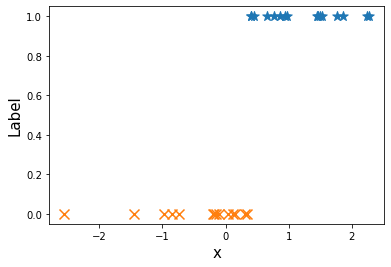

In [6]:
plt.scatter(xs[ys == 1],ys[ys == 1],marker = '*',s = 100)
plt.scatter(xs[ys == 0],ys[ys == 0],marker = 'x',s = 100)
plt.xlabel('x',size = 15)
plt.ylabel('Label',size = 15)
plt.show()

Assuming g(x) represents the sigmoid function
$$
g(x) = \frac{1}{1 + e^{-x}}
$$
A general form of logistic regression fits model of the form
$$
h(x) = g(X\beta) = \frac{1}{1 + e^{-X\beta}}
$$

Hence again, like linear regression, we will create a X matrix from the data locations x to fit the logistic Regression model.

### <mark style="background-color: #FFFF00">Exercise</mark> 
Since $$\hat{y} = p(y = 1) = h(x) = \frac{1}{1+e^{-X\beta}}$$ 
can we still minimize
$$
\min_{\beta}\sum_{i=1}^n(y-\hat{y})^2
$$
to find the best set of $\beta$ ?

## Optimization problem we have to solve

When a random variable can only assume two possible outcomes, it is a Bernoulli Random Variable. Hence, in the data above, since for every x, y can only be 0 or 1, so x is a Bernoulli Random Variable.

In, order to find the best value of coefficients $\beta$, we will write the likelihood of observing the data and then find the value of these $\beta$ coefficients that will maximize this likelihood.

**The likelihood**:

$$
L = \Pi_{i|y_i =1}h(x_i) \Pi_{i|y_i = 0} (1 - h(x_i)) \tag{1}
$$

By maximizing L, $h(x_i)$ will be forced to be close to 1 when $y_i = 1$ and $h(x_i)$ will be forced to be close to 0 when $y_i = 0$. Hence if
$$
h(x_i) = \frac{1}{1 + e^{-X\beta}}
$$

An algorithm maximizing L, will try to find coefficients $\beta$ that makes $h(x_i) \to 1$ when $y_i = 1$, and $h(x_i) \to 0$ when $y_i = 0$

### Changing likelihood to negative log likelihood

Since maximizing the product terms in (1) is challenging, we convert (1) to an equivalent problem form by taking a log (converts products to sum of terms) and multiplying a negative 1. So essentially, we have following equivalent problems
$$
\max_\beta L  \equiv \min_{\beta} - log(L) \equiv \min_{\beta} LL \quad \text{  where }LL = -log(L) 
$$

\begin{align}
LL &= -log(L)\\
&= -\sum_{i|y_i = 1} log(h(x_i)) - \sum_{i|y_i = 0} log(1 - h(x_i))\\
&= -\sum_i \Big [y_i log(h(x_i)) + (1 - y_i)log(1 - h(x_i)) \Big]
\end{align}

**Hence we have to solve the optimization problem**:
$$
\min_\beta LL = 
\boxed{
\min_{\beta} -\sum_i \Big [y_i log(h(x_i)) + (1 - y_i)log(1 - h(x_i)) \Big]} \tag{2}
$$

where $$h(x) = \frac{1}{1+e^{-X\beta}}$$ 

Remember
1. The above loss function is convex
2. Dont have a closed form solution like linear Regression
3. Hence, we use iterative algorithms to find the solution
